## Morning practical 2 day 5

Hey ~and welcome to the Shrek in the swamp karaoke dance party~, welcome to the short practical on PCA. Here you'll play around with performing PCA and projecting data yourself. You should know that in actual practice, fast algorithms for PCA use something called spectral value decomposition (SVD), so they don't actually explicitly calculate the eigenvectors and eigenvalues in the way explained here.

You'll be given some sample data, and asked to calculate the covariance matrix yourself. Then, you can calculate eigenvectors of the covariance matrix (using built-in numpy tools, rather than solving the algebra manually), and transform some 3D data to 2D in this way. Let's get to it!

In [1]:
#run this cell to set things up
import ipywidgets as widgets, numpy as np, pandas as pd
from numpy.random import default_rng
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import seaborn as sns
from IPython.display import display, Markdown
import sklearn
from sklearn.datasets import make_blobs, make_classification
import itertools

In [2]:
def calcEucliDist(vectorOne, vectorTwo):
    return np.linalg.norm(vectorOne-vectorTwo, axis = 1)

def calcAbsDist(vectorOne, vectorTwo):
    #using linalg.norm:
    return np.linalg.norm(vectorOne-vectorTwo, ord = 1, axis = 1)

def makeKMeanClusters(X, k, funName = "calcEucliDist", maxIter = 50, nClusteringsToPerform = 20):
    if k <= 0:
        print("K must be greater than 0!")
        return None
    if k > len(X):
        print("K cannot be larger than the # of samples in your data!")
        return None
    if maxIter <= 0:
        print("Cannot have negative or 0 iterations!")
        return None
    
    resultToReturn = [None, None, None, None]
    bestDistortion = np.Inf
    
    for clusteringIndex in range(0, nClusteringsToPerform):
        initialCentroids   = X[np.random.choice(X.shape[0], k, replace=False), :]
        if len(initialCentroids) != k:
            print("Centroids lost!")
        centroids          = initialCentroids
        threeLastCentroids = []
        #print(centroids)
        for i in range(0, maxIter):

            threeLastCentroids.append(np.round(centroids, 4))
            distancesToCentroids = np.vstack([globals()[funName](centroids, datapoint) for datapoint in X])
            closestCentroid      = np.where(distancesToCentroids == np.amin(distancesToCentroids,
                                                                            axis = 1)[:, np.newaxis])[1]
            centroids            = np.vstack([np.mean(X[np.where(closestCentroid == clusterNum)],
                                                      axis = 0) for clusterNum in np.unique(closestCentroid)])

            if i >2:
                threeLastCentroids.pop(0)
                if np.array_equal(threeLastCentroids[-1],threeLastCentroids[-2]) and np.array_equal(threeLastCentroids[-2], threeLastCentroids[-3]):
                    print("No changes in cluster centroids detected in last 3 iterations. Finished at iteration " + str(i+1) + ".")
                    break
        
        # new code
        squareDistancesPerPoint = []
        for index, centroid in enumerate(closestCentroid):
            squareDistancesPerPoint.append(np.square(centroids[centroid, :] - X[index, :]))
        distortion = 1/len(X) * np.sum(np.array(squareDistancesPerPoint))
        
        if distortion < bestDistortion:
            bestDistortion = distortion
            resultToReturn = [centroids, closestCentroid, initialCentroids, bestDistortion]
                
    return resultToReturn

## Sample data

Let's keep things in the visualisable domain first and focus on a dataset in 3 dimensions that we want to try and reduce to two dimensions. Feel free to rotate and zoom the 3D visualisation below.

<IPython.core.display.Javascript object>


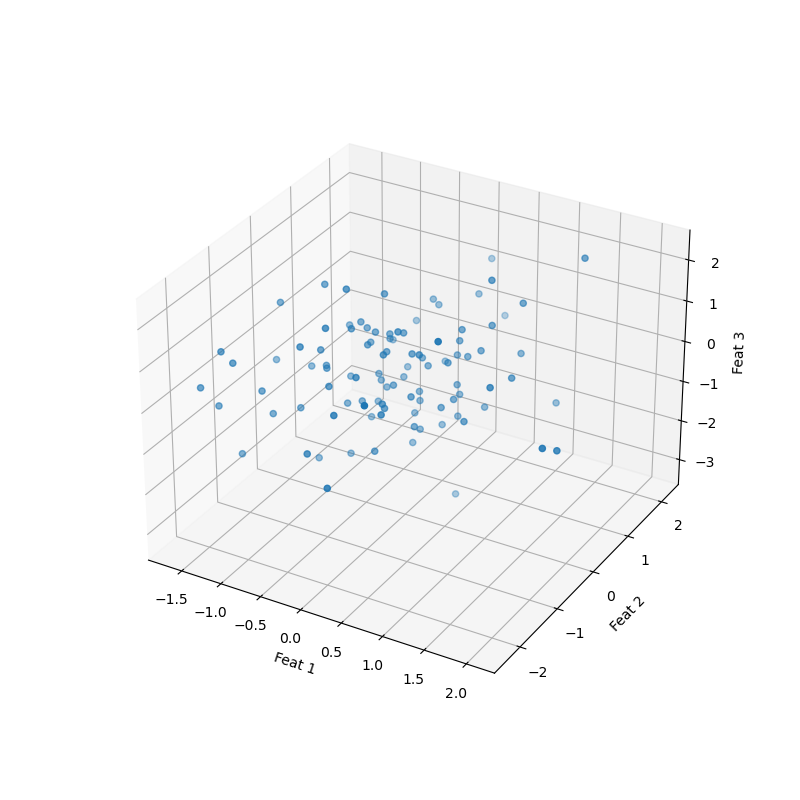

Text(0.5, 0, 'Feat 3')

In [2]:
X, y = make_classification(n_samples = 100, n_features = 3, n_informative = 2,
                           n_redundant = 0, n_classes = 2, hypercube = False, random_state=42)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:,0], X[:, 1], X[:,2] )
ax.set_ylabel("Feat 2")
ax.set_xlabel("Feat 1")
ax.set_zlabel("Feat 3")

## Implementing the covariance function
Of course, calculating covariance is done so often that standard functions are available. Still, if you implement it yourself you should know exactly what's going on. Implement the `calcCov()` function that takes in two vectors and calculates their covariance. Be sure to check that the vectors are the same length and, if not, return `None`.

In [4]:
# your answer below

# answer
def calcCov(vecOne, vecTwo):
    if len(vecOne) != len(vecTwo):
        print("Error: vectors should be equal length to calculate covariance!")
        return None
    else:
        meanVecOne         = np.mean(vecOne); meanVecTwo = np.mean(vecTwo)
        vecOneMeanCentered = vecOne - meanVecOne; vecTwoMeanCentered = vecTwo - meanVecTwo
        covariance         = 1/(len(vecOne)-1) * np.sum(vecOneMeanCentered * vecTwoMeanCentered)
        return covariance
    

## Thinking about covariance

The covariance is how certain features vary with each other. To look at this visually, we can make 2D plots of every feature with every other feature and see whether we think they co-vary or not. Let's also annotate it with the actual covariance, calculated using your function. Below, I give you the code to get all the combinations of the 3 features (including with themselves, which is just the variance). Up to you to: 
* Plot a 2D scatterplot of each pair of features in X
* Calculate the covariance of those features
* Annotate the scatterplot with this information (say, using `ax.set_title("Covariance: " + str(myCovarianceValue))`
* To check that your calculated (co)variances are correct, use `np.cov(X.T)`. The output should correspond to what you have calculated.

(0, 0)
(0, 1)
(0, 2)
(1, 1)
(1, 2)
(2, 2)


<IPython.core.display.Javascript object>


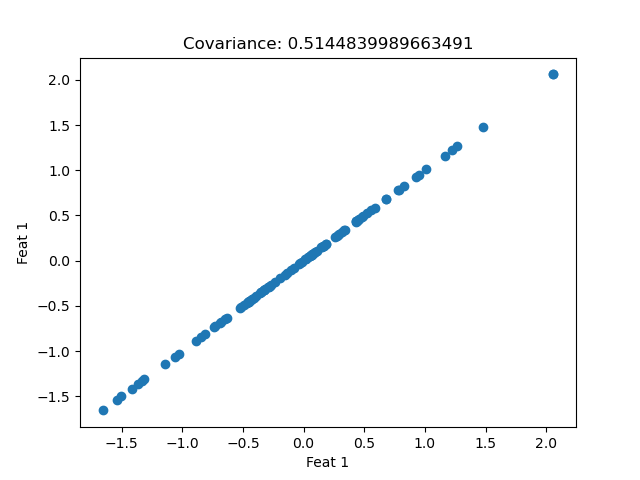

<IPython.core.display.Javascript object>


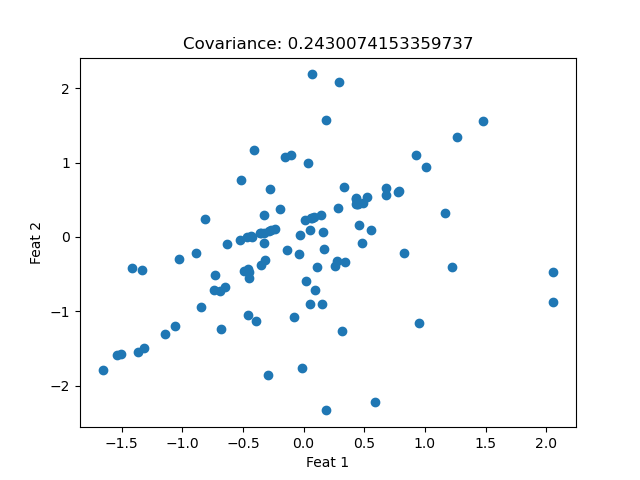

<IPython.core.display.Javascript object>


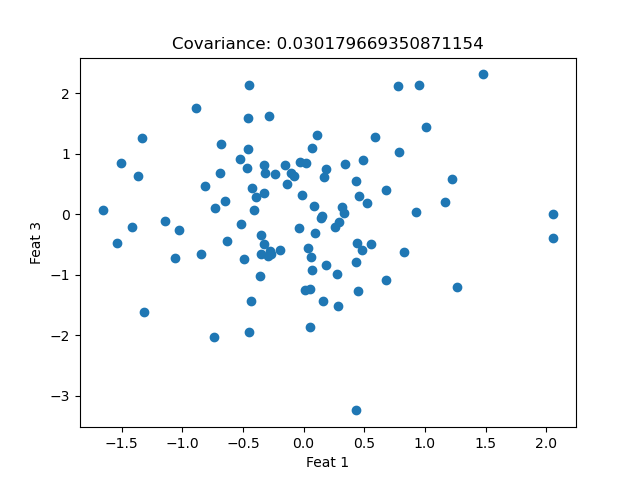

<IPython.core.display.Javascript object>


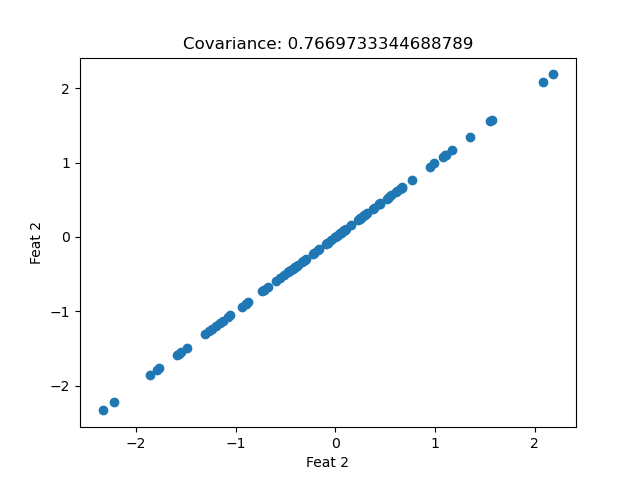

<IPython.core.display.Javascript object>


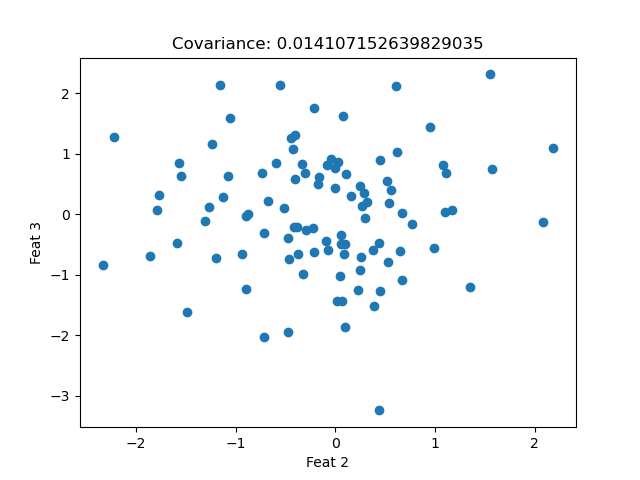

<IPython.core.display.Javascript object>


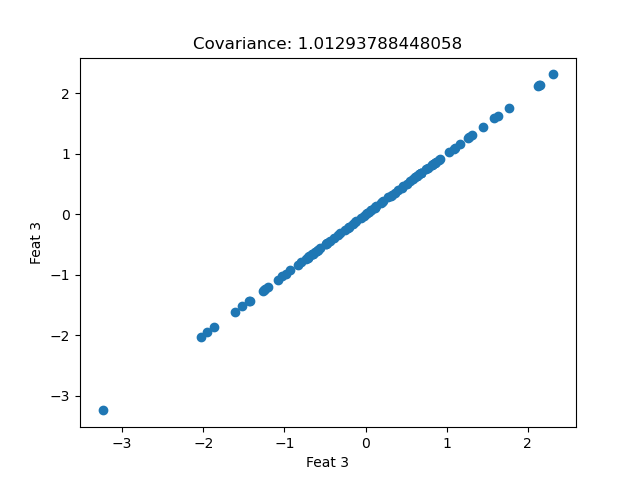

[[0.514484   0.24300742 0.03017967]
 [0.24300742 0.76697333 0.01410715]
 [0.03017967 0.01410715 1.01293788]]


In [5]:
for combo in itertools.combinations_with_replacement([0, 1, 2], 2):
    print(combo)
    
    
#answer 

for combo in itertools.combinations_with_replacement([0, 1, 2], 2):
    fig, ax = plt.subplots()
    ax.scatter(X[:,combo[0]], X[:,combo[1]])
    ax.set_xlabel("Feat " + str(combo[0] + 1))
    ax.set_ylabel("Feat " + str(combo[1] + 1))
    ax.set_title("Covariance: " + str(calcCov(X[:,combo[0]], X[:,combo[1]])))
    fig.show()
    
print(np.cov(X.T))

## Results

If all goes well, you should see that feature 1 and feature 2 (column 0 and 1) have quite some covariance, which is observable in the 2D scatterplot as some heavy-handed linear scatter points being thrown in (it almost seems like some dots were generated as a line, on the background of a random blob). The other 2 combinations of features have basically no covariance: knowing something about the value of feature 2 tells you precisely nothing about the value of feature 3. The straight lines are just scatterplots of a feature with itself, which is uninformative. There, you just calculate the variance: the average sum of square differences from the feature to its mean, i.e. the spread of this feature around its mean.

If covariance is still unclear to you, feel free to watch [this excellent step-by-step explanation of it by the most honourable Lord StatQuest](https://www.youtube.com/watch?v=qtaqvPAeEJY)

## Getting eigenvectors of the covariance matrix

To do dimension reduction, we want to calculate the eigenvectors of the covariance matrix. These are vectors that, when multiplied with the covariance matrix, only shrink or elongate, but never change direction. It turns out that these vectors point exactly along the axis of most variation in the data, then the axis of second most variation in the data, etc., when ordered according to the size of their eigenvalues.

It might be interesting to see for yourself what happens to a vector in the 3D space upon repeated multiplication with the covariance matrix. Let's start with the vector $\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$ and see where it goes. Up to you to:
* Make a for loop from 1 to 10 inclusive
* For each iteration, make a new figure (copying the code that's there), and change d,e,f to the correct locations.
* In that subplot, multiply the covariance matrix with the vector 0, 1, 2,  3, 4, etc. times. This is linear algebra, so use @. Note: doing `covMatrix @ (covMatrix @ data)` = `np.power(covMatrix, 2) @ data`. Just use the latter formulation with your for-loop. 

Question:
* What direction does the arrow point in? Does this match with your idea from the (co)variances you calculated above?

<IPython.core.display.Javascript object>


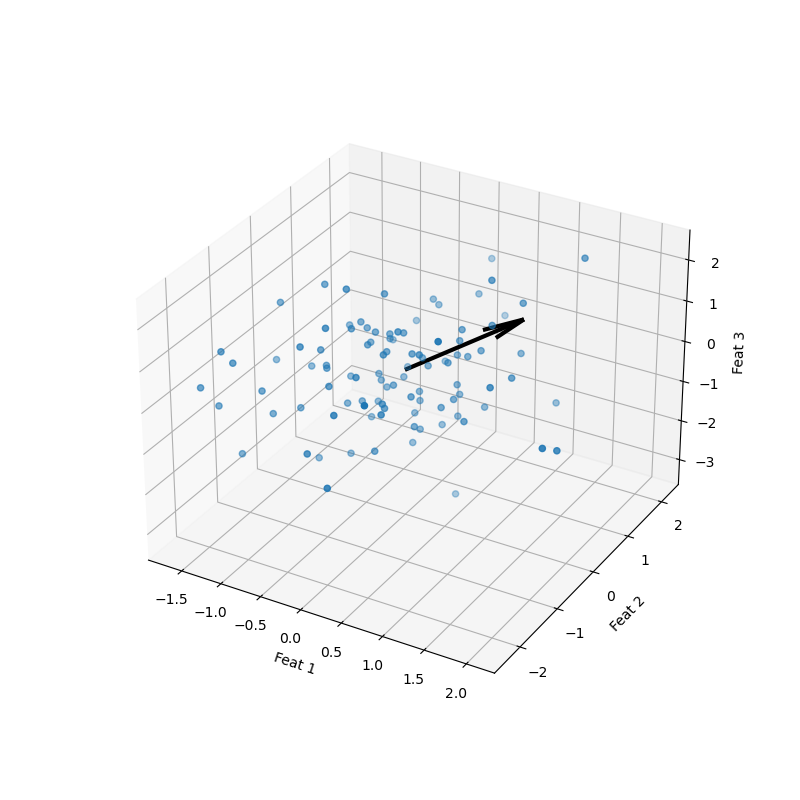

<IPython.core.display.Javascript object>


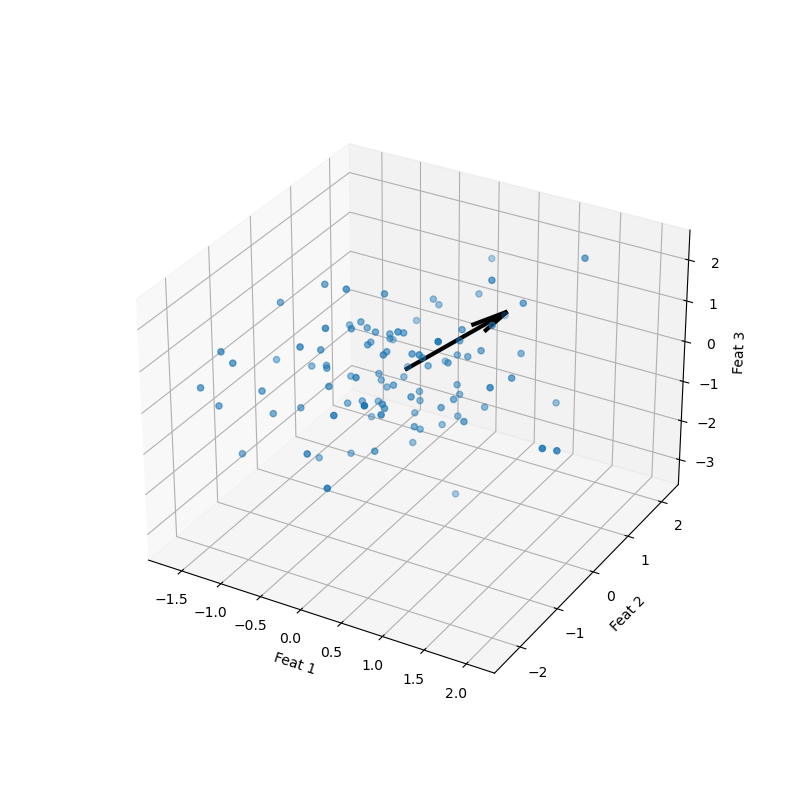

<IPython.core.display.Javascript object>


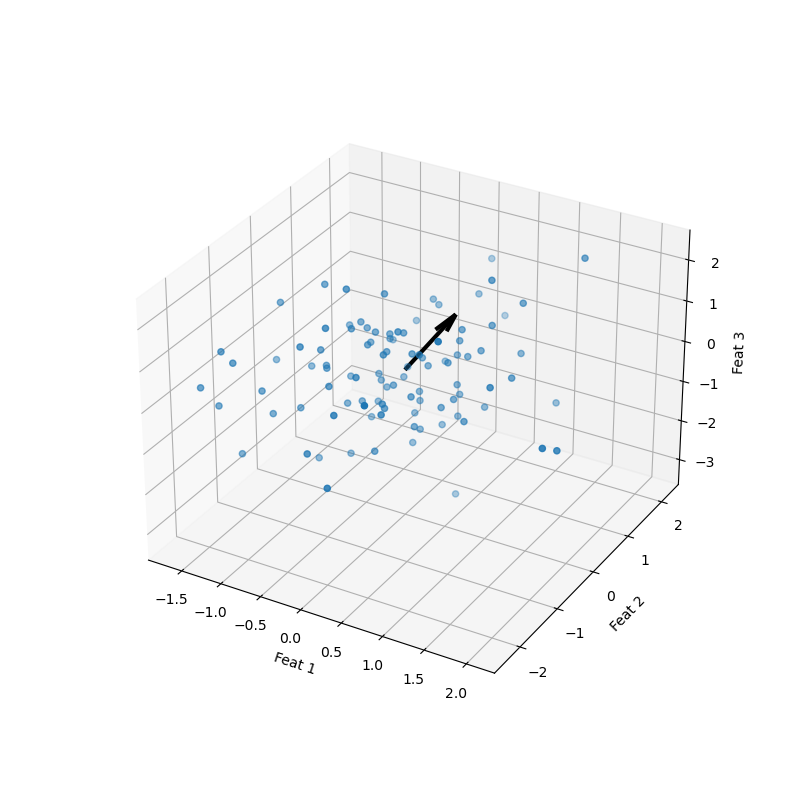

<IPython.core.display.Javascript object>


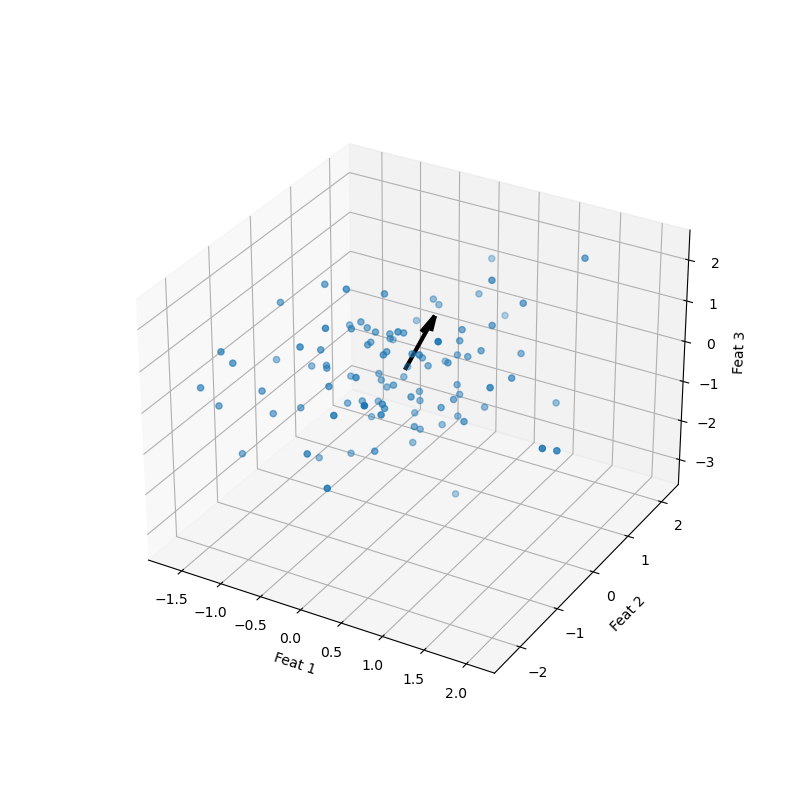

<IPython.core.display.Javascript object>


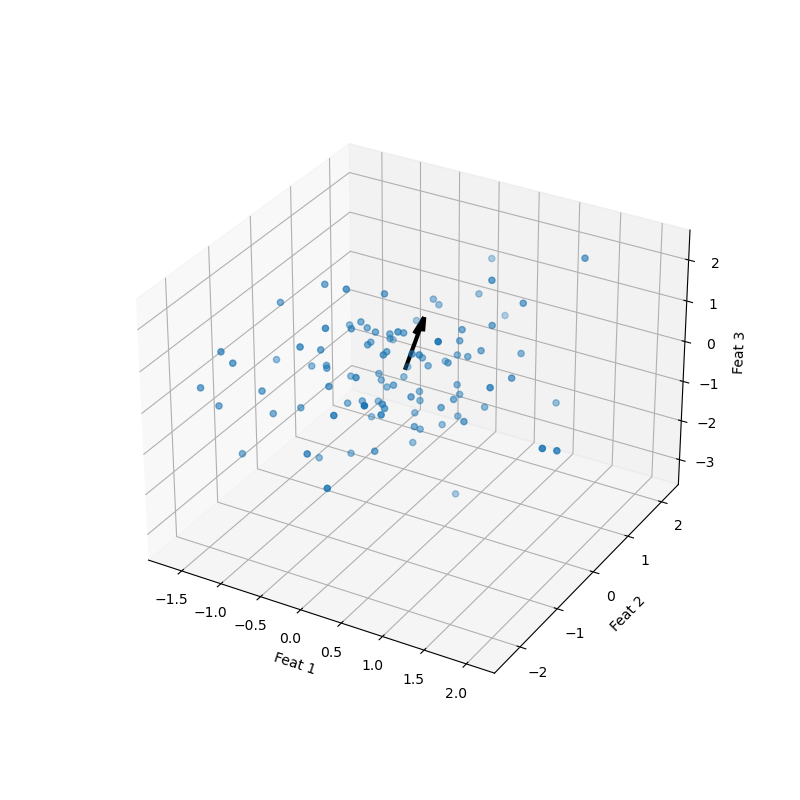

<IPython.core.display.Javascript object>


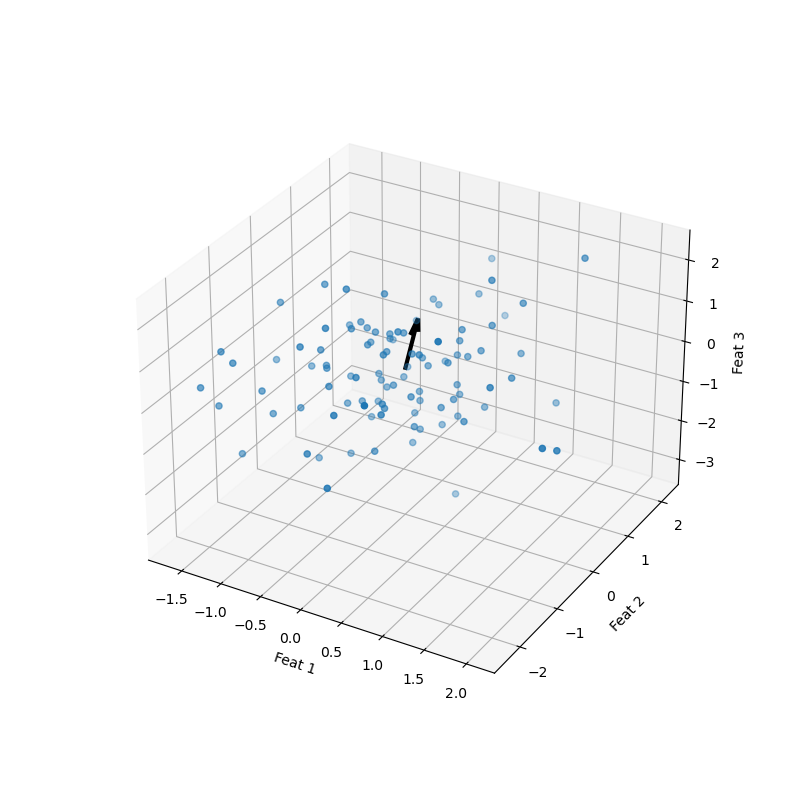

<IPython.core.display.Javascript object>


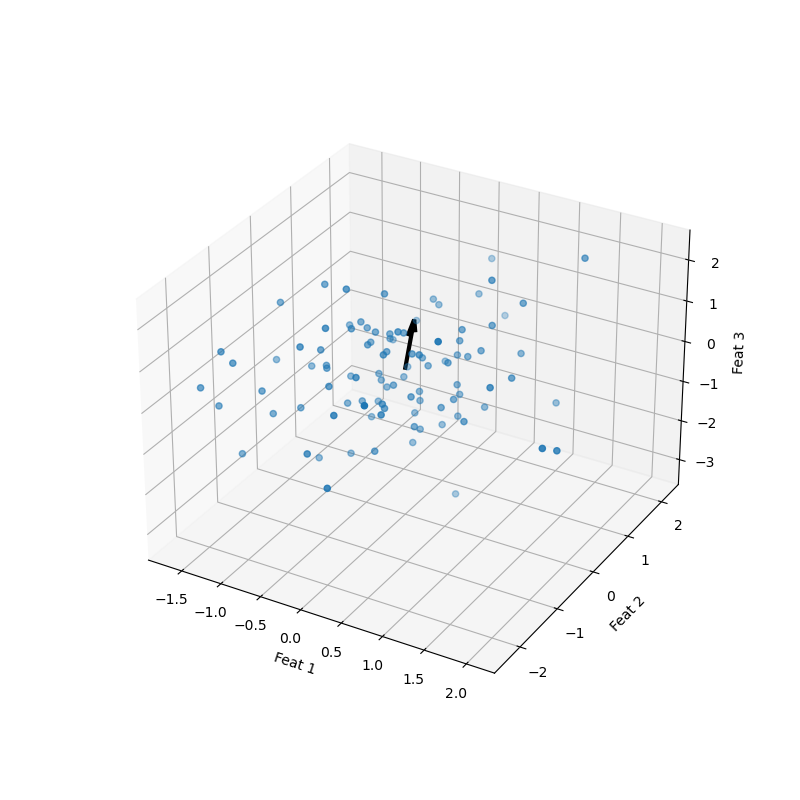

<IPython.core.display.Javascript object>


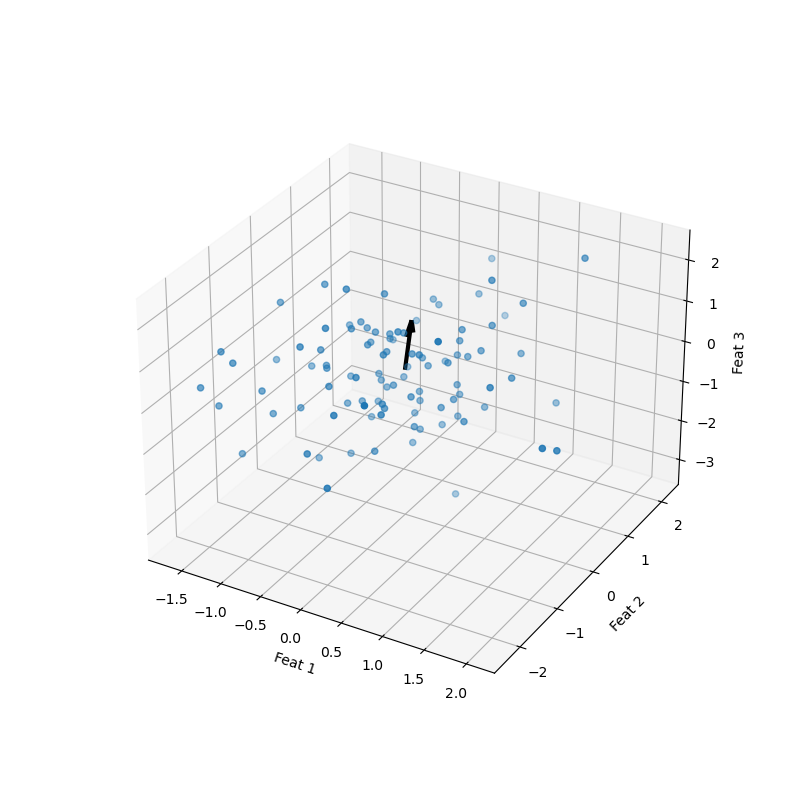

<IPython.core.display.Javascript object>


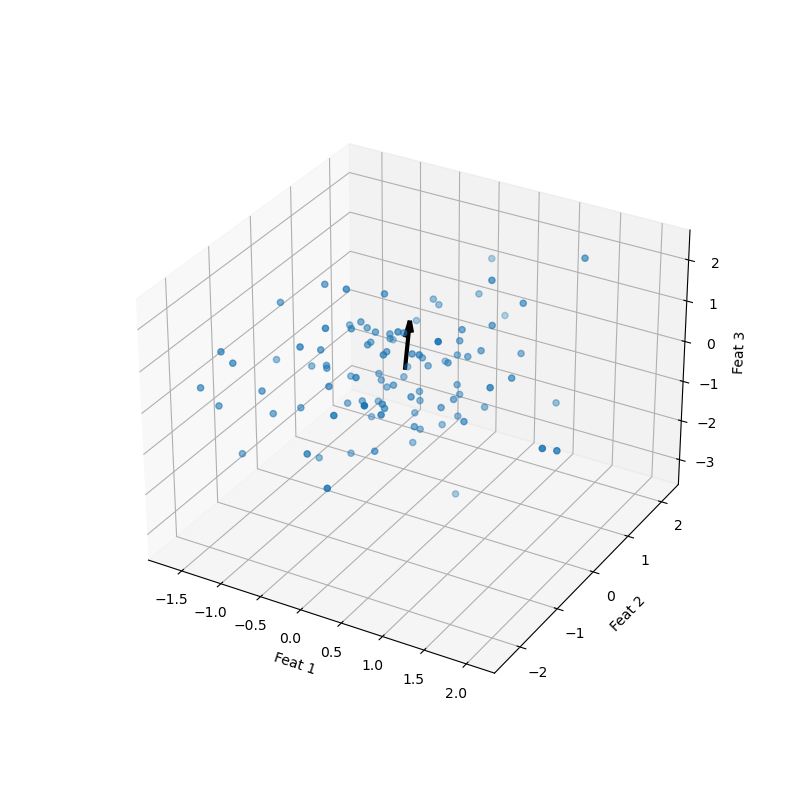

<IPython.core.display.Javascript object>


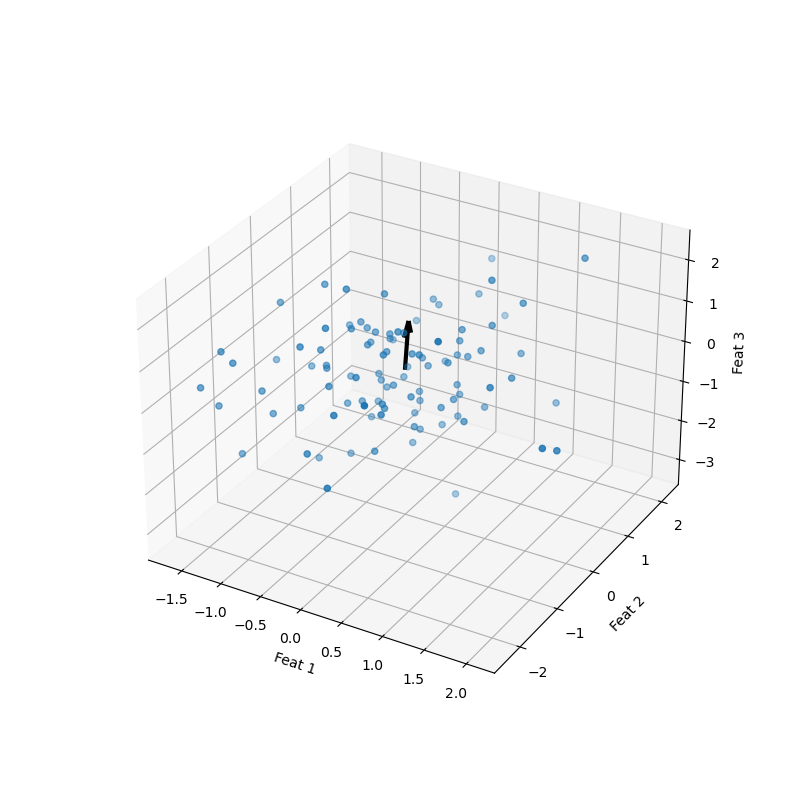

<IPython.core.display.Javascript object>


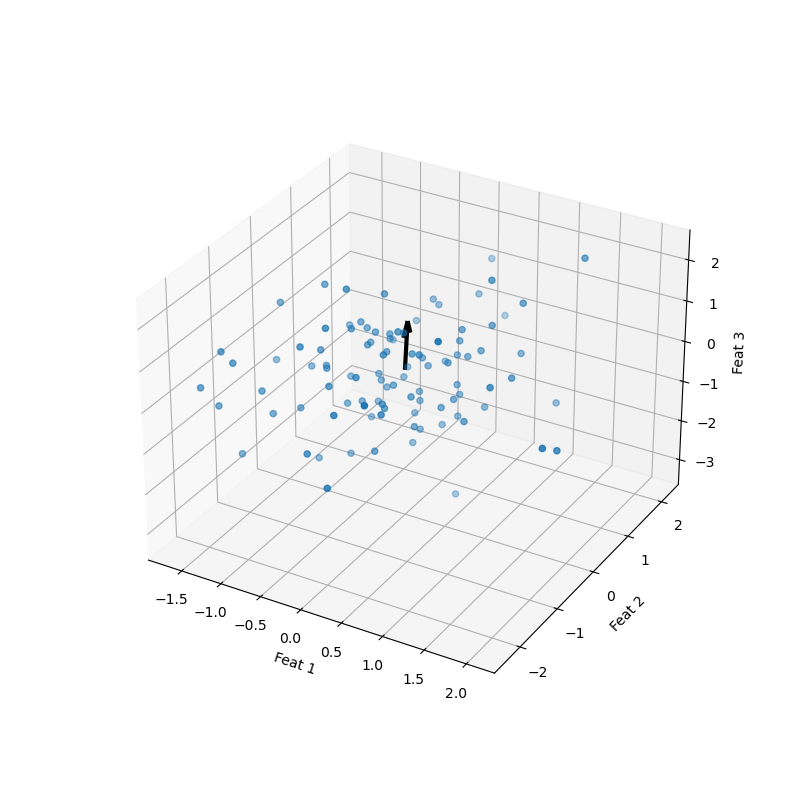

Final Eigenvector: 
[[[0.00130005]]

 [[0.07043801]]

 [[1.1371772 ]]]
Final Eigenvector unit norm: 
[[[0.00114103]]

 [[0.06182258]]

 [[0.9980865 ]]]


In [6]:
# start 
xVectorOrigin = np.array([[0],[0],[0]])
xVectorEnd    = np.array([[1],[1],[1]])
covarianceMatrix = np.cov(X.T)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:,0], X[:, 1], X[:,2] )
ax.set_ylabel("Feat 2")
ax.set_xlabel("Feat 1")
ax.set_zlabel("Feat 3")
a, b, c = xVectorOrigin
d, e, f = xVectorEnd
ax.quiver(a,b,c,d,e,f, colors = "black", linewidths = 3)
fig.show()


#up to remake the figure when multiplying the vector with the covariance matrix

#answer
for i in range(1, 11):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(X[:,0], X[:, 1], X[:,2] )
    ax.set_ylabel("Feat 2")
    ax.set_xlabel("Feat 1")
    ax.set_zlabel("Feat 3")
    a, b, c = xVectorOrigin
    d, e, f = np.power(covarianceMatrix, i) @ xVectorEnd
    ax.quiver(a,b,c,d,e,f, colors = "black", linewidths = 3)
    fig.show()
    
print("Final Eigenvector: \n" + str(np.array([[d],[e],[f]])))
print("Final Eigenvector unit norm: \n" + str(np.array([[d],[e],[f]])/np.linalg.norm(np.array([[d],[e],[f]]))))

## Result

If all goes well, your result should look something like ![this](largestEigVecResult.PNG)That makes sense: PCA rotates the data, making linear combinations of your data axes (here: feat1, feat2, and feat3) that maximise the variance along each new axis. When calculating the (co)variances above, it was clear that most of the variance in the data is in feature 3. And whaddaya know, this eigenvector points mostly in that direction, and only a tiny bit in the direction of feature 2, and almost not in the direction of feature 1. Note that here we did not impose the constraint of unit length (that the square root of the square of vector elements should correspond to one). Actually, we weren't _quite_ doing the correct thing, but it gives you an idea. You can do it correctly below!

## Doing PCA on our data.

Let's now do PCA and reduce the dimensionality of the data to two dimensions. To do this:
* Mean-center your data and make sure it has unit variance (use `np.mean(X, axis = 0)` and `np.std(X, axis = 0)`) 
* Calculate the covariance matrix (`np.cov(XMeanCentered.T)`)
* Calculate the eigenvalues and eigenvectors of the covariance matrix (`np.linalg.eig()`). These eigenvectors are already unit length.
* Draw these eigenvectors in the 3D visualisation of the data (you can copy the code from above and slightly edit quiver to make it work)
* Multiply (@) each of the samples with the 2 eigenvectors with the highest eigenvalues. Remember, the eigenvector is a recipe, saying something like 'to make my new axis that has the highest/second-highest/third-highest etc. variance, combine 0.2 parts original axis 1, 0.5 parts original axis 2, and 0.3 parts original axis 3'. So if you multiply a sample's coordinates `[x,y,z]` with an eigenvector $\begin{bmatrix} xPart \\ yPart \\ zPart \end{bmatrix}$ you get its coordinates on that new axis!
* Draw a new 2D plot with the coordinates on the first 2 PCs. Include the % of variance explained (remember, that's eigenvalue_of_PC/sum(eigenvalues)\*100%)

Hints:
* The eigenvalues returned from this are not ordered according to magnitude! You need to pick the two eigenvectors corresponding to the two largest eigenvalues yourself! Probably easiest to use `np.argsort()` ([click](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)) to sort the eigenvalues and eigenvectors the same way. Note: to sort in descending order use `yourArray.argsort()[::-1]` (see [here](https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order))
* When sorting your eigenvectors, make sure you ony sort the columns, i.e. use `eigenvectors[:,argSortIndices]`.
* You can get the coordinates of PC One using `d,e,f = yourSortedEigenvectors[:,0]`
* The answers have a labelled 3D plot of the PCs, so you can check whether they match there.

[1.40517963 0.61847067 1.00665273]
[[ 0.70499128  0.70807816 -0.04015737]
 [ 0.70154023 -0.70455043 -0.10700463]
 [ 0.10406054 -0.04726532  0.99344723]]
sorted:
[1.40517963 1.00665273 0.61847067]
[[ 0.70499128 -0.04015737  0.70807816]
 [ 0.70154023 -0.10700463 -0.70455043]
 [ 0.10406054  0.99344723 -0.04726532]]


<IPython.core.display.Javascript object>


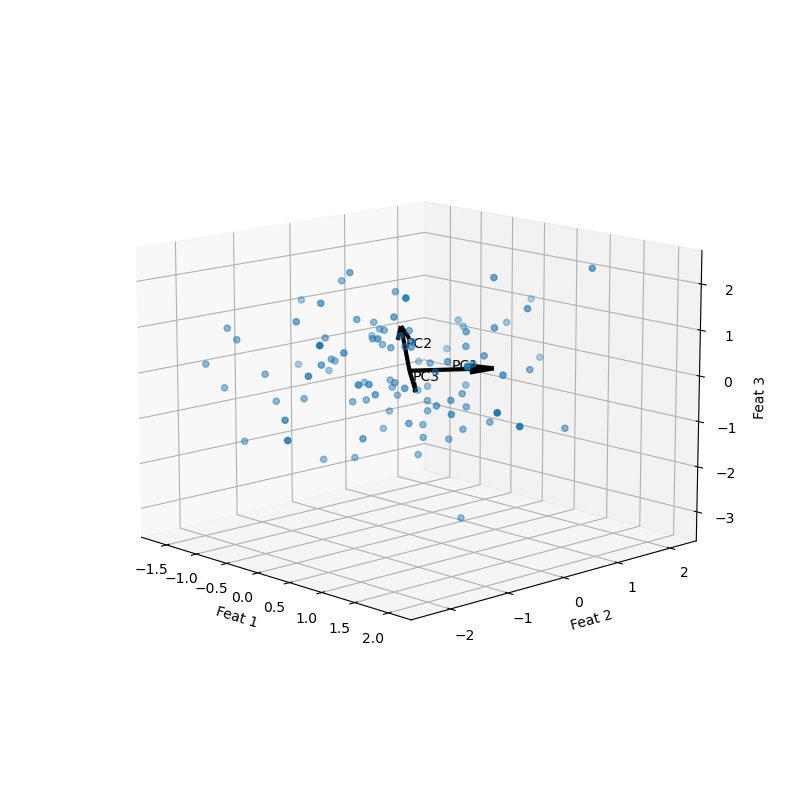

<IPython.core.display.Javascript object>


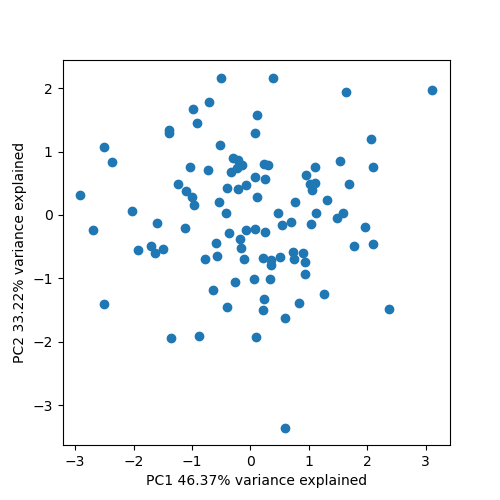

Text(0, 0.5, 'PC2 33.22% variance explained')

In [7]:
# your answer here



# answer
meanX         = np.mean(X, axis = 0)
stdX          = np.std(X, axis = 0)
XMeanCentered = (X - meanX)/stdX
covMatrix     = np.cov(XMeanCentered.T)
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print(eigenvalues); print(eigenvectors)

indicesForSorting = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indicesForSorting]; eigenvectors = eigenvectors[:,indicesForSorting]
print("sorted:")
print(eigenvalues); print(eigenvectors)

# drawing 3D plot
xVectorOrigin = np.array([[0],[0],[0]])
PCOneEnd    = eigenvectors[:,0]; PCTwoEnd = eigenvectors[:,1];PCThreeEnd = eigenvectors[:,2]
covarianceMatrix = np.cov(X.T)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:,0], X[:, 1], X[:,2] )
ax.set_ylabel("Feat 2")
ax.set_xlabel("Feat 1")
ax.set_zlabel("Feat 3")
a, b, c = xVectorOrigin
d,e,f = PCOneEnd
ax.quiver(a,b,c,d,e,f, colors = "black", linewidths = 3)
ax.text(d/2, e/2, f/2, "PC1")
d,e,f = PCTwoEnd
ax.quiver(a,b,c,d,e,f, colors = "black", linewidths = 3)
ax.text(d/2, e/2, f/2, "PC2")
d,e,f = PCThreeEnd
ax.quiver(a,b,c,d,e,f, colors = "black", linewidths = 3)
ax.text(d/2, e/2, f/2, "PC3")
fig.show()

#making 2D plot
newData = (XMeanCentered @ eigenvectors)[:,0:2]
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(newData[:,0], newData[:,1])
ax.set_xlabel("PC1 " + str(np.round(eigenvalues[0]/np.sum(eigenvalues)*100, 2)) + "% variance explained")
ax.set_ylabel("PC2 " + str(np.round(eigenvalues[1]/np.sum(eigenvalues)*100, 2)) + "% variance explained")



## Result

If you're confused that the eigenvectors are so different than the first one you 'calculated' before, that's because I fooled you a bit. To get a feel for what happens with the covariance matrix we multiplied it with X, but actually the data should be mean-centered and have unit variance, and the vectors should have unit length! Before, feature 3 had a variance of ~1, whereas feature 1 had a variance of only something like 0.5, and feature 2 a variance of ~0.75. Therefore, if you put them on the same scale, it makes sense that now feature 1 and feature 2 are more important than before. This shows the importance of scaling and mean-centering correctly.

Notice that you have about 79% of the variance in the data on these two axes. Not too shabby, seeing as you've sheared off a whole dimension. 

## Why should you care?

This example is, of course, contrived. We have some nameless features, and only 3 of them to boot, and we're doing some magic and -huzzah- there's your 2D plot. Underwhelming, one might say. Now imagine, however, that you've just assayed gene expression of 20.000 genes in 5 conditions and you want to predict the experimental condition based on the genes. As you've seen in the morning practical, your ML algorithm will work great on training data, but crash and burn when presented with test data. But PCA can come to the rescue: PCA will combine all the 20.000 genes into new axes, axes that are mostly made up of the genes that vary most. It's quite probable that 10.000 genes are basically doing nothing in response to your experimental condition, so the eigenvector components of your top _n_ eigenvalues for those genes will be next to nothing. Your first PCs, however, by their nature, will combine the genes that vary most in your dataset. You might even find that these PCs correspond to known gene circuits, etc. The ability to rotate your data and keep a lot of the variance in _vastly_ fewer dimensions is a sort of ML superpower!

## Covariance matrix with linear algebra and using SVD

Before, I let you calculate the covariances yourself one by one. Note that, if you have unit variance and zero mean, you can calculate the covariance matrix with $\frac{1}{m} \cdot X^T \cdot X$ Why? Well, if you have the following feature matrix with 2 samples in the rows and two features in the columns: $$\begin{bmatrix} 3 & 4 \\ 8 & 2 \end{bmatrix}$$ then if you do:
$$\frac{1}{m} \cdot \begin{bmatrix} 3 & 8 \\ 4 & 2 \end{bmatrix} \cdot \begin{bmatrix} 3 & 4 \\ 8 & 2 \end{bmatrix}$$ you get 4 outcomes:
$$\begin{bmatrix} \frac{1}{m} \cdot (3 \cdot 3 + 8 \cdot 8) & \frac{1}{m} \cdot (3 \cdot 4 + 8 \cdot 2) \\ \frac{1}{m} \cdot (4 \cdot 3 + 2 \cdot 8) & \frac{1}{m} \cdot (4 \cdot 4 + 2 \cdot 2) \end{bmatrix}$$ Which is exactly the covariance matrix:
$$\begin{bmatrix} \sigma_{1,1} & \sigma_{1,2} \\ \sigma_{2,1} & \sigma_{2,2} \end{bmatrix}$$

Most implementations actually use SVD to calculate the eigenvectors and eigenvalues, not direct calculation of eigenvectors using the covariance matrix. You don't need to know what it does, exactly, it's just a generalisation of calculating eigenvectors and eigenvalues that is faster and **doesn't require you outright calculating the covariances, which can be a real burden when the number of features is large!**. Below I write code for calculating the eigenvectors and eigenvalues using SVD. See [here](https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8) for more information if you're interested.

Note that the axes are flipped relative to your PCA plot above. That's because it's arbitrary whether you put the vector along which you order the points from, say, 0 to -1 or from 0 to 1: it defines the same line through the high-dimensionals space.

U:
[[-4.33545916e-02  6.58043894e-02 -6.56327174e-02]
 [-2.93739163e-02  7.92566944e-02  2.20622355e-02]
 [ 2.47107140e-01 -3.22708748e-02  3.32370111e-02]
 [-1.66467833e-01  1.96914924e-02  3.63612681e-03]
 [-6.80433417e-03  2.22537514e-02 -6.67787207e-02]
 [ 1.63589053e-01  5.58674292e-02  1.46189256e-02]
 [ 7.42543658e-02  1.91074518e-01  4.39893518e-03]
 [ 1.42275124e-02  5.24764228e-02  5.19214636e-02]
 [-2.78358995e-02  1.01033287e-01  1.90969482e-02]
 [ 2.01462365e-01 -8.42925212e-02  2.48383398e-02]
 [-4.99049922e-02  1.62800962e-01  2.56321292e-03]
 [-6.49163831e-02 -2.05896829e-02 -3.28336298e-02]
 [-1.49795925e-01  4.94979325e-02 -3.05179511e-01]
 [ 6.01188047e-02 -1.77611162e-01  1.08612463e-01]
 [-1.78457709e-01  4.56424498e-02  1.85291020e-01]
 [-2.91072595e-02  7.15310420e-02  1.05908530e-01]
 [ 1.72187457e-01 -5.58396219e-03  1.68759756e-02]
 [-2.08354231e-02  2.70507453e-02  1.51393765e-01]
 [ 3.42947617e-02  1.45370284e-01  5.54979117e-02]
 [-9.35336857e-02 -5.1053423

<IPython.core.display.Javascript object>


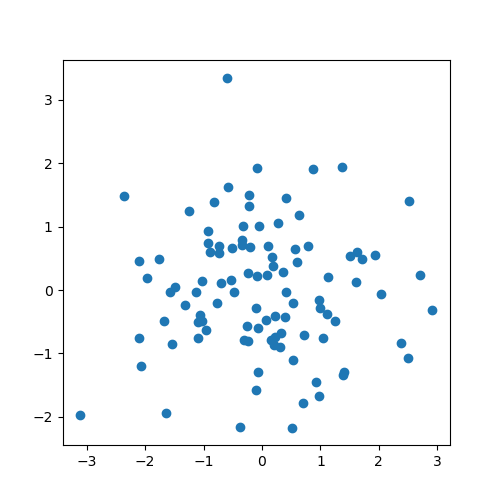

In [5]:
meanX         = np.mean(X, axis = 0)
stdX          = np.std(X, axis = 0)
XMeanCentered = (X - meanX)/stdX
#covMatrix = XMeanCentered.T @ XMeanCentered
U, Sigma, V = np.linalg.svd(XMeanCentered, full_matrices = False)
print("U:")
print(U)
print("Sigma:")
print(Sigma)
transformedData = U @ np.diag(Sigma)
twoAxes = transformedData[:,0:2]

fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(twoAxes[:,0], twoAxes[:,1])
fig.show()


In [8]:
np.mean(X, axis = 0)


array([-0.05001324, -0.13680163,  0.03518804])

## Finishing up the short practical

As a final relaxed exercise to make sure that these concepts land, please (re)watch the StatQuest PCA video, which does a great job explaining terminology and the intuition behind PCA. [Here you go!](https://www.youtube.com/watch?v=FgakZw6K1QQ)

As an extra, I would also recommend reading this post: [click](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues), and looking over [this](https://setosa.io/ev/principal-component-analysis/).

## What I'd like you to remember here
* PCA is a thing. It uses the covariance matrix to rotate the space, whereby new axes become linear combinations of the original dimensions.
* You need to center your data (and optionally scale the data to unit variance: if you _don't do this_, features with higher variance will influence the rotation more. By scaling you treat all features equally).
* I'd like you to have a good intuitive understanding of what PCA is doing, which the StatQuest video and StackExchange thread should have helped with.

## Survey
[Yes](https://docs.google.com/forms/d/e/1FAIpQLScuEqvjDRIMq_dsqaK4fsYhF_i9NKbBg0wsqKmlASofaKFR1g/viewform?usp=sf_link)